In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/datasets/IMDB.zip

-rw------- 1 root root 60711700 Mar 31 06:19 '/content/drive/My Drive/Colab Notebooks/datasets/IMDB.zip'


In [3]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/IMDB.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: __MACOSX/aclImdb/train/pos/._7754_9.txt  
  inflating: aclImdb/train/pos/7755_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7755_9.txt  
  inflating: aclImdb/train/pos/7756_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7756_10.txt  
  inflating: aclImdb/train/pos/7757_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7757_9.txt  
  inflating: aclImdb/train/pos/7758_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7758_7.txt  
  inflating: aclImdb/train/pos/7759_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7759_10.txt  
  inflating: aclImdb/train/pos/775_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._775_7.txt  
  inflating: aclImdb/train/pos/7760_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7760_10.txt  
  inflating: aclImdb/train/pos/7761_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7761_10.txt  
  inflating: aclImdb/train/pos/7762_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7762_8.txt  
  inflating:

In [9]:
import os
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train')

labels=[]
texts=[]

for label_type in ['neg', 'pos']:
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name):
    if fname[-4:] == '.txt':
      f = open(os.path.join(dir_name, fname), encoding='utf8')
      texts.append(f.read())
      f.close()
      if label_type == 'neg':
        labels.append(0)
      else:
        labels.append(1)

print(fname)
print('='*30)
print(dir_name)

2114_10.txt
aclImdb/train/pos


In [10]:
len(texts), len(labels)

(25000, 25000)

In [11]:
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

maxlen = 2000
max_words= 10000

tokenizer= Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data= pad_sequences(sequences, maxlen=maxlen)
labels = np.asarray(labels)
print('데이터 텐서의 크기 :', data.shape)
print('레이블 텐서의 크기 : ', labels.shape)

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

training_samples = 15000
validation_samples = 10000

X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples:training_samples+validation_samples]
y_valid = labels[training_samples:training_samples+validation_samples]
print(X_train.shape, y_train.shape, X_valid.shape, y_valid.shape)

88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기 : (25000, 2000)
레이블 텐서의 크기 :  (25000,)
(15000, 2000) (15000,) (10000, 2000) (10000,)


In [12]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/datasets/GloVe.zip

-rw------- 1 root root 862182613 Mar 31 06:21 '/content/drive/My Drive/Colab Notebooks/datasets/GloVe.zip'


In [13]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/GloVe.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/GloVe.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [15]:
import numpy as np
import os

glove_dir ='.'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype = 'float32')
  embeddings_index[word] = coefs
f.close()

print(f'{len(embeddings_index)}개의 단어 벡터를 찾았습니다')

400000개의 단어 벡터를 찾았습니다


In [16]:
embeddings_index['apple'].shape

(100,)

In [19]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if i < max_words:
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector

In [18]:
embedding_matrix.shape

(10000, 100)

In [20]:
from keras import models, layers

imdb = models.Sequential()
imdb.add(layers.Embedding(max_words, embedding_dim, input_length=maxlen))
imdb.add(layers.LSTM(16))
imdb.add(layers.Dropout(0.5))
imdb.add(layers.Dense(1, activation='sigmoid'))

In [21]:
imdb.layers[0].set_weights([embedding_matrix])
imdb.layers[0].trainable=False

imdb.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2000, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 16)                7488      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 1,007,505
Trainable params: 7,505
Non-trainable params: 1,000,000
_________________________________________________________________


In [22]:
imdb.compile(loss = 'binary_crossentropy',optimizer = 'adam', metrics = ['accuracy'])

In [23]:
%%time
Hist_imdb = imdb.fit(X_train, y_train,epochs = 100,batch_size = 512, validation_data = (X_valid, y_valid))

Epoch 1/100
30/30 [==============================] - 40s 251ms/step - loss: 0.7083 - accuracy: 0.5211 - val_loss: 0.6715 - val_accuracy: 0.5985
Epoch 2/100
30/30 [==============================] - 7s 236ms/step - loss: 0.6629 - accuracy: 0.6017 - val_loss: 0.5827 - val_accuracy: 0.7080
Epoch 3/100
30/30 [==============================] - 7s 236ms/step - loss: 0.5780 - accuracy: 0.7208 - val_loss: 0.5311 - val_accuracy: 0.7502
Epoch 4/100
30/30 [==============================] - 7s 237ms/step - loss: 0.5445 - accuracy: 0.7421 - val_loss: 0.5049 - val_accuracy: 0.7671
Epoch 5/100
30/30 [==============================] - 7s 236ms/step - loss: 0.5116 - accuracy: 0.7667 - val_loss: 0.4799 - val_accuracy: 0.7819
Epoch 6/100
30/30 [==============================] - 7s 237ms/step - loss: 0.4879 - accuracy: 0.7809 - val_loss: 0.4636 - val_accuracy: 0.7872
Epoch 7/100
30/30 [==============================] - 7s 236ms/step - loss: 0.4748 - accuracy: 0.7907 - val_loss: 0.4550 - val_accuracy: 0.797

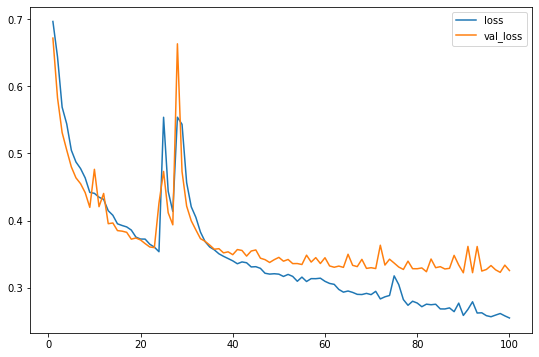

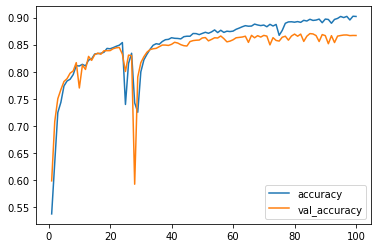

In [26]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_imdb.history['loss'])+1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_imdb.history['loss'])
plt.plot(epochs, Hist_imdb.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(epochs, Hist_imdb.history['accuracy'])
plt.plot(epochs, Hist_imdb.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [28]:
loss, accuracy = imdb.evaluate(X_valid, y_valid)
loss, accuracy

313/313 [==============================] - 9s 29ms/step - loss: 0.3258 - accuracy: 0.8669


(0.32578304409980774, 0.8669000267982483)